# EXO 1 :

In [1]:
import numpy as np                 #pour faire des mathematiques numeriques
import matplotlib.pyplot as plt    #pour afficher des images (fonction imshow)
import numpy.random as nprand      #pour tirer des valeurs aléatoirement
import scipy.ndimage as scim       #pour tout ce qui tourne autour du filtrage et le traitement d'image de base
import matplotlib.pyplot

In [2]:
def showImage3channels(InputImage):
  plt.figure(1)
  plt.imshow(InputImage[:,:,0],cmap='Greys')
  plt.title('channel 1: red')
  plt.colorbar()
  
  plt.figure(2)
  plt.imshow(InputImage[:,:,1],cmap='Greys')
  plt.title('channel 2: green')
  plt.colorbar()
  
  plt.figure(3)
  plt.imshow(InputImage[:,:,2],cmap='Greys')
  plt.title('channel 3: blue')
  plt.colorbar()
  
  plt.show()



In [3]:
def showImage1channel(InputImage):
  imgplot = plt.imshow(InputImage,cmap='Greys')
  #imgplot = plt.imshow(InputImage)
  plt.colorbar()
  plt.show()

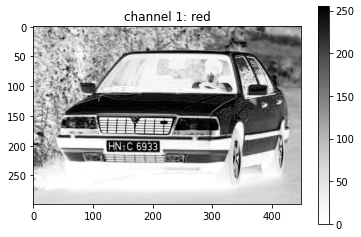

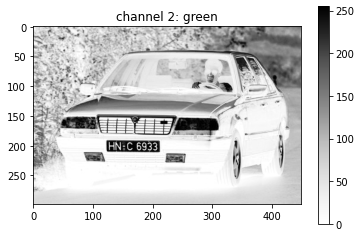

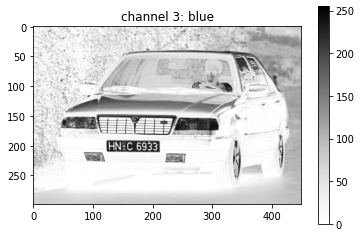

In [5]:

Im2=matplotlib.pyplot.imread('J18_E1_kmeans.jpg')
Im=Im2*1.
showImage3channels(Im)

### QUESTION 1 : 
retransformer la forme de l'image pour qu'elle soit un array 
2D de taille (M,3), ou M est le nombre de pixel dans l'image et 3 
correspond au cannaux RGB dans l'image. Chaque pixel de l'image peut
alors etre considere comme une observation en dimension 3.

#### aide:
-  pour connaitre la taille de l'image, on peut utiliser Im.shape
-  pour changer la forme d'un numpy array, utiliser reshape



In [6]:
Im.shape

(298, 450, 3)

In [7]:
X = Im.reshape(298*450, 3)

In [8]:
X.shape

(134100, 3)

### QUESTION2 : 
Utiliser l'algorithme de K-means pour attribuer un label (segmenter)
a chaque pixel de l'image



In [12]:
from scipy.cluster.vq import kmeans2

In [13]:
centroid, label = kmeans2(X, 3, minit='points')

In [14]:
label

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [15]:
label.shape

(134100,)

### QUESTION 3 :
transformer la forme des labels pour quelle corresponde a la forme 
de l'image initiale

In [18]:
label = label.reshape(298, 450,)

In [19]:
label.shape

(298, 450)

# EXO 2 :

In [20]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time

In [21]:
#read data
dataframe=pandas.read_csv("./J18_E2_coordinates_morroco.csv",sep=',')
print(dataframe.head)
listColNames=list(dataframe.columns)

<bound method NDFrame.head of                      city      lat      lng  country iso2  \
0              Casablanca  33.5992  -7.6200  Morocco   MA   
1    El Kelaa des Srarhna  32.0500  -7.4000  Morocco   MA   
2                     Fès  34.0433  -5.0033  Morocco   MA   
3                 Tangier  35.7767  -5.8039  Morocco   MA   
4               Marrakech  31.6295  -7.9811  Morocco   MA   
..                    ...      ...      ...      ...  ...   
157              Gueznaia  35.7200  -5.8940  Morocco   MA   
158        Oulad Hassoune  31.6503  -7.8361  Morocco   MA   
159           Bni Frassen  34.3819  -4.3761  Morocco   MA   
160              Tifariti  26.0928 -10.6089  Morocco   MA   
161         Zawit Al Bour  30.6748  -8.1742  Morocco   MA   

                    admin_name  capital  population  population_proper  
0            Casablanca-Settat    admin   4370000.0          4370000.0  
1               Marrakech-Safi      NaN   1450021.0          1450021.0  
2                 

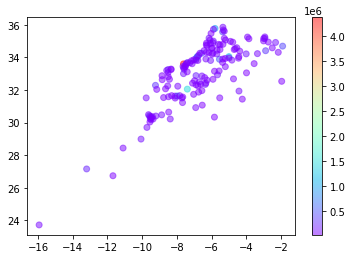

In [22]:
#get usefull information
X=dataframe[['lat','lng']].values

X_with_pop=dataframe[['lat','lng','population']].values

city_names=list(dataframe['city'])

plt.scatter(X[:,1],X[:,0],c=X_with_pop[:,2],cmap='rainbow',alpha=0.5)
plt.colorbar()
plt.show()

### QUESTION 1:
- Allez a la page https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
- Trouvez comment effectuer une classification hierarchique pour clusteriser les villes du Maroc
en 4 groupes a l'aide de leurs coordonnees GPS (lattitude et longitude)
- Que signifient les differentes options de 'linkage'?
- Effectuez les clusterings avec les differentes options de 'linkage'. Comparez les temps de calculs
et les clusters trouves
- Comment expliquez-vous les differences de temps et de clusterings?

In [32]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 4).fit(X)

In [33]:
clustering.labels_

array([3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 2, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 2, 1, 2, 3, 0, 1, 0, 1, 0, 3, 2, 1, 2, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 1, 2, 3, 0, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0,
       1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 0, 1, 2,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 2, 1, 2, 1, 0, 1, 2,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 2,
       1, 0, 3, 0, 3, 0, 3, 0, 1, 2, 3, 0, 3, 0, 1, 0, 1, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 3, 2, 1, 2, 3, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       1, 0, 3, 0, 1, 2, 3, 0, 3, 0, 1, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0,
       3, 0, 3, 2, 1, 0, 3, 0, 3, 0, 1, 2, 3, 0, 1, 2, 1, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 2, 1, 2, 3, 0, 3, 0, 1, 0, 3, 0,
       1, 2, 3, 0, 1, 0, 1, 2, 3, 0, 1, 2, 1, 2, 3,

In [ ]:
plt.plot()

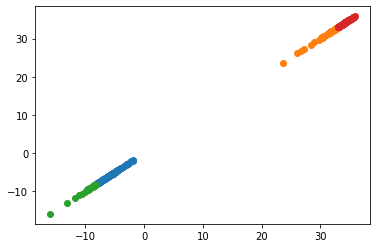

In [30]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset

# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
X = X.reshape(-1, 1)
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix], X[row_ix, 0])
# show the plot
pyplot.show()